In [16]:
!pip install tensorflow --quiet

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image

In [59]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.data import AUTOTUNE
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [29]:
#uncomment when NOT using colab:
# directory = "../raw_data/dataset-resized/"

#uncomment below when using colab:
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/dataset-original"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
paper = list(glob(f'{directory}/paper/*'))
PIL.Image.open(str(paper[0]))

In [31]:
batch_size = 32
img_height = 180
img_width = 180

In [33]:
train_ds = image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [37]:
val_ds = image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [38]:
class_names = train_ds.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


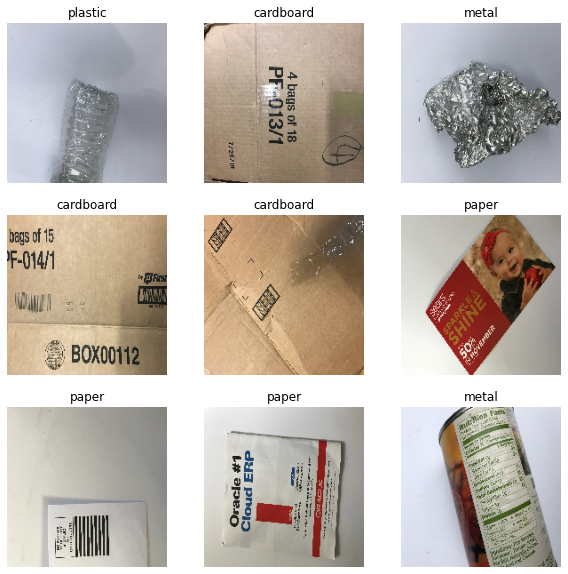

In [39]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [43]:
normalization_layer = Rescaling(1./255)

In [49]:
AUTOTUNE = AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
num_classes = 6

model = Sequential([
  normalization_layer,
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [60]:
model.compile(
  optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [61]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
64/64 [==============================] - 180s 3s/step - loss: 1.5823 - accuracy: 0.3318 - val_loss: 1.3978 - val_accuracy: 0.4416
Epoch 2/10
64/64 [==============================] - 74s 1s/step - loss: 1.2729 - accuracy: 0.4906 - val_loss: 1.3221 - val_accuracy: 0.4634
Epoch 3/10
64/64 [==============================] - 75s 1s/step - loss: 1.1808 - accuracy: 0.5341 - val_loss: 1.2288 - val_accuracy: 0.5307
Epoch 4/10
64/64 [==============================] - 76s 1s/step - loss: 1.0241 - accuracy: 0.6029 - val_loss: 1.2798 - val_accuracy: 0.5446
Epoch 5/10
64/64 [==============================] - 75s 1s/step - loss: 0.8899 - accuracy: 0.6667 - val_loss: 1.4579 - val_accuracy: 0.4950
Epoch 6/10
64/64 [==============================] - 75s 1s/step - loss: 0.7831 - accuracy: 0.7097 - val_loss: 1.3342 - val_accuracy: 0.5386
Epoch 7/10
64/64 [==============================] - 76s 1s/step - loss: 0.6453 - accuracy: 0.7651 - val_loss: 1.4755 - val_accuracy: 0.5307
Epoch 8/10
64/64 [=